In [33]:
import pandas as pd

df = pd.read_json('/root/Diagoriente/parcours.json')

In [34]:
df.shape

(5802, 5)

In [35]:
df.head()

,_id,userId,skills,families,createdAt
0,5ef206deb53ca61c0a04e6d7,"{'profile': {'firstName': 'Ernest', 'lastName'...",[],[],2020-06-23T13:42:54.956Z
1,5ed4c5beb53ca61c0a04be9d,"{'profile': {'firstName': 'DELPHINE', 'lastNam...","[{'activities': [{'description': None, 'intere...","[{'_id': '5c9c7e255bc8cb4c4e4cefa3', 'nom': 'É...",2020-06-01T09:09:18.785Z
2,5eb27ef0b53ca61c0a049eab,"{'profile': {'firstName': 'Tony', 'lastName': ...",[{'activities': [{'description': 'Découvrir le...,"[{'_id': '5c9c7f2a5bc8cb4c4e4cefad', 'nom': 'A...",2020-05-06T09:10:08.766Z
3,5ef1f4e6b53ca61c0a04e69e,"{'profile': {'firstName': 'Rayhan', 'lastName'...",[{'activities': [{'description': 'Charpentier'...,"[{'_id': '5c9c7f035bc8cb4c4e4cefab', 'nom': 'M...",2020-06-23T12:26:14.263Z
4,5ea6885eb53ca61c0a049254,"{'profile': {'pseudo': None, 'firstName': 'vic...",[],"[{'_id': '5c9c7e255bc8cb4c4e4cefa3', 'nom': 'É...",2020-04-27T07:23:10.027Z


In [37]:
df.userId.iloc[0]

{'_id': '5ef206deb53ca61c0a04e6d5',
 'email': 'ernest.chabanel@gmail.com',
 'profile': {'firstName': 'Ernest', 'lastName': 'Chabanel'},
 'role': 'user'}

In [69]:
df.families.iloc[1]

[{'_id': '5c9c7e255bc8cb4c4e4cefa3',
  'nom': 'Éduquer / Conseiller / Expliquer / Guider / Informer'},
 {'_id': '5c9c7e7a5bc8cb4c4e4cefa6',
  'nom': "Soigner / S'occuper de personnes ou d'animaux / Défendre / Servir / Aider"},
 {'_id': '5c9c7f035bc8cb4c4e4cefab',
  'nom': 'Manipuler la matière / Travailler avec ses mains'},
 {'_id': '5c9c7e3c5bc8cb4c4e4cefa4', 'nom': 'Ecrire / Lire / Raconter'},
 {'_id': '5c9c7f2a5bc8cb4c4e4cefad',
  'nom': 'Analyser / Enquêter / Rechercher / Etudier'}]

In [70]:
print("Ventilation par nombre de families renseignés: ")
per_families = df['families'].apply(lambda x: len(x)).value_counts()/df.shape[0]*100

round(per_families.reset_index(drop = False))

Ventilation par nombre de families renseignés: 


,index,families
0,0,55.0
1,5,34.0
2,4,4.0
3,3,3.0
4,2,2.0
5,1,1.0


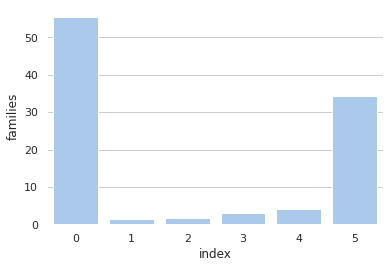

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

sns.set_color_codes("pastel")
sns.barplot(x="index", y="families", data=per_families.reset_index(drop = False),
            label="Total", color="b")
sns.despine(left=True, bottom=True)
plt.show()

In [72]:
print("Ventilation par nombre de skills renseignés: ")
per_skills = df['skills'].apply(lambda x: len(x)).value_counts()/df.shape[0]*100

round(per_skills.reset_index(drop = False).head())

Ventilation par nombre de skills renseignés: 


,index,skills
0,0,25.0
1,2,16.0
2,1,10.0
3,3,8.0
4,4,6.0


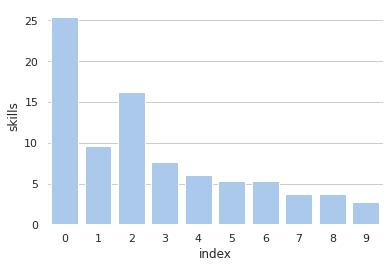

In [73]:
sns.set(style="whitegrid")

sns.set_color_codes("pastel")
sns.barplot(x="index", y="skills", data=per_skills.reset_index(drop = False).head(10),
            label="Total", color="b")
sns.despine(left=True, bottom=True)
plt.show()

# FAMILIES

In [74]:
def get_nom(x, i):
    try:
        return x[i]['nom']
    except:
        return ''
    
for i in range(5):
    feature = 'Familie_' + str(i)
    df[feature] = df['families'].apply(lambda x: get_nom(x, i))

In [75]:
df['Families_new'] = df['Familie_0'] + ' -- ' + df['Familie_1'] + ' -- ' + df['Familie_2'] + ' -- ' + df['Familie_3'] + ' -- ' + df['Familie_4']

del df['Familie_0']
del df['Familie_1']
del df['Familie_2']
del df['Familie_3']
del df['Familie_4']

In [76]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(tokenizer=lambda x: x.split(' -- '))
df = pd.DataFrame(vectorizer.fit_transform(df['Families_new']).todense())

df.columns = vectorizer.get_feature_names()

df

,,accueillir / communiquer / dialoguer,aménager / classer / assembler / collecter,analyser / enquêter / rechercher / etudier,animer / distraire / entraîner,arbitrer / décider / diriger / gérer / juger,bricoler / dépanner / nettoyer / réparer,calculer / evaluer / mesurer / tester,conduire / manœuvrer / transporter / livrer,construire / confectionner / fabriquer,...,décorer / dessiner / exercer un art / peindre / sculpter,ecouter / interviewer / traduire,ecrire / lire / raconter,exercer une activité physique,manipuler la matière / travailler avec ses mains,mettre au point / imaginer / concevoir / inventer,planifier / programmer / organiser / régler,soigner / s'occuper de personnes ou d'animaux / défendre / servir / aider,"utiliser le numérique, l'informatique",éduquer / conseiller / expliquer / guider / informer
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,1
2,4,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,1,1,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5797,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5798,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5799,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,1,1,0
5800,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,1,0,1,0,1,0


In [77]:
round(df.sum()[1:].sort_values(ascending = False)/df.shape[0]*100)

soigner / s'occuper de personnes ou d'animaux / défendre / servir / aider    17.0
utiliser le numérique, l'informatique                                        16.0
éduquer / conseiller / expliquer / guider / informer                         15.0
planifier / programmer / organiser / régler                                  15.0
exercer une activité physique                                                14.0
manipuler la matière / travailler avec ses mains                             14.0
analyser / enquêter / rechercher / etudier                                   13.0
accueillir / communiquer / dialoguer                                         11.0
convaincre / négocier / promouvoir / commercialiser / vendre                 10.0
mettre au point / imaginer / concevoir / inventer                            10.0
ecrire / lire / raconter                                                      9.0
animer / distraire / entraîner                                                8.0
décorer / dessin

In [78]:
def get_feature_correlation(df, top_n=None, corr_method='spearman',
                            remove_duplicates=True, remove_self_correlations=True):
    """
    Compute the feature correlation and sort feature pairs based on their correlation

    :param df: The dataframe with the predictor variables
    :type df: pandas.core.frame.DataFrame
    :param top_n: Top N feature pairs to be reported (if None, all of the pairs will be returned)
    :param corr_method: Correlation compuation method
    :type corr_method: str
    :param remove_duplicates: Indicates whether duplicate features must be removed
    :type remove_duplicates: bool
    :param remove_self_correlations: Indicates whether self correlations will be removed
    :type remove_self_correlations: bool

    :return: pandas.core.frame.DataFrame
    """
    corr_matrix_abs = df.corr(method=corr_method)
    corr_matrix_abs_us = corr_matrix_abs.unstack()
    sorted_correlated_features = corr_matrix_abs_us \
        .sort_values(kind="quicksort", ascending=False) \
        .reset_index()

    # Remove comparisons of the same feature
    if remove_self_correlations:
        sorted_correlated_features = sorted_correlated_features[
            (sorted_correlated_features.level_0 != sorted_correlated_features.level_1)
        ]

    # Remove duplicates
    if remove_duplicates:
        sorted_correlated_features = sorted_correlated_features.iloc[:-2:2]

    # Create meaningful names for the columns
    sorted_correlated_features.columns = ['Feature 1', 'Feature 2', 'Correlation']

    if top_n:
        return sorted_correlated_features[:top_n]

    sorted_correlated_features= sorted_correlated_features[sorted_correlated_features['Feature 1'] != '']
    sorted_correlated_features= sorted_correlated_features[sorted_correlated_features['Feature 2'] != '']
    return sorted_correlated_features

In [79]:
get_feature_correlation(df)[:10]

,Feature 1,Feature 2,Correlation
23,éduquer / conseiller / expliquer / guider / in...,soigner / s'occuper de personnes ou d'animaux ...,0.400932
25,bricoler / dépanner / nettoyer / réparer,construire / confectionner / fabriquer,0.387315
27,manipuler la matière / travailler avec ses mains,exercer une activité physique,0.341819
29,éduquer / conseiller / expliquer / guider / in...,accueillir / communiquer / dialoguer,0.306150
31,manipuler la matière / travailler avec ses mains,bricoler / dépanner / nettoyer / réparer,0.305354
33,construire / confectionner / fabriquer,manipuler la matière / travailler avec ses mains,0.302101
35,planifier / programmer / organiser / régler,"utiliser le numérique, l'informatique",0.297310
37,analyser / enquêter / rechercher / etudier,"utiliser le numérique, l'informatique",0.280316
39,mettre au point / imaginer / concevoir / inventer,analyser / enquêter / rechercher / etudier,0.278850
41,soigner / s'occuper de personnes ou d'animaux ...,ecrire / lire / raconter,0.269624


# Skills - Activites

In [1]:
import pandas as pd

df = pd.read_json('/root/Diagoriente/parcours.json')

df['len_skills'] = df['skills'].apply(lambda x: len(x))

df = df[df['len_skills'] > 0]

In [4]:
df.head()

,_id,userId,skills,families,createdAt,len_skills
1,5ed4c5beb53ca61c0a04be9d,"{'profile': {'firstName': 'DELPHINE', 'lastNam...","[{'activities': [{'description': None, 'intere...","[{'_id': '5c9c7e255bc8cb4c4e4cefa3', 'nom': 'É...",2020-06-01T09:09:18.785Z,1
2,5eb27ef0b53ca61c0a049eab,"{'profile': {'firstName': 'Tony', 'lastName': ...",[{'activities': [{'description': 'Découvrir le...,"[{'_id': '5c9c7f2a5bc8cb4c4e4cefad', 'nom': 'A...",2020-05-06T09:10:08.766Z,1
3,5ef1f4e6b53ca61c0a04e69e,"{'profile': {'firstName': 'Rayhan', 'lastName'...",[{'activities': [{'description': 'Charpentier'...,"[{'_id': '5c9c7f035bc8cb4c4e4cefab', 'nom': 'M...",2020-06-23T12:26:14.263Z,12
5,5ef1edbbb53ca61c0a04e671,"{'profile': {'firstName': 'Laura', 'lastName':...",[{'activities': [{'description': 'Préparer les...,"[{'_id': '5c9c7f035bc8cb4c4e4cefab', 'nom': 'M...",2020-06-23T11:55:39.398Z,11
6,5e2477871a704d077aa8e1e4,"{'profile': {'pseudo': None, 'firstName': 'Rap...",[{'activities': [{'description': 'Créer un sit...,"[{'_id': '5c9c7f035bc8cb4c4e4cefab', 'nom': 'M...",2020-01-19T15:36:39.230Z,3


In [5]:
def get_activities(x):
    try:
        if len(x[0]) > 0:
            return x[0]
        else:
            return ''
    except:
        return ''

df["Activities"] = df['skills'].apply(lambda x: get_activities(x).get("activities"))

In [6]:
df.head()

,_id,userId,skills,families,createdAt,len_skills,Activities
1,5ed4c5beb53ca61c0a04be9d,"{'profile': {'firstName': 'DELPHINE', 'lastNam...","[{'activities': [{'description': None, 'intere...","[{'_id': '5c9c7e255bc8cb4c4e4cefa3', 'nom': 'É...",2020-06-01T09:09:18.785Z,1,"[{'description': None, 'interests': ['5c922b47..."
2,5eb27ef0b53ca61c0a049eab,"{'profile': {'firstName': 'Tony', 'lastName': ...",[{'activities': [{'description': 'Découvrir le...,"[{'_id': '5c9c7f2a5bc8cb4c4e4cefad', 'nom': 'A...",2020-05-06T09:10:08.766Z,1,[{'description': 'Découvrir le monde du travai...
3,5ef1f4e6b53ca61c0a04e69e,"{'profile': {'firstName': 'Rayhan', 'lastName'...",[{'activities': [{'description': 'Charpentier'...,"[{'_id': '5c9c7f035bc8cb4c4e4cefab', 'nom': 'M...",2020-06-23T12:26:14.263Z,12,"[{'description': 'Charpentier', 'interests': [..."
5,5ef1edbbb53ca61c0a04e671,"{'profile': {'firstName': 'Laura', 'lastName':...",[{'activities': [{'description': 'Préparer les...,"[{'_id': '5c9c7f035bc8cb4c4e4cefab', 'nom': 'M...",2020-06-23T11:55:39.398Z,11,"[{'description': 'Préparer les commandes', 'in..."
6,5e2477871a704d077aa8e1e4,"{'profile': {'pseudo': None, 'firstName': 'Rap...",[{'activities': [{'description': 'Créer un sit...,"[{'_id': '5c9c7f035bc8cb4c4e4cefab', 'nom': 'M...",2020-01-19T15:36:39.230Z,3,[{'description': 'Créer un site internet/blog'...


In [7]:
def get_description(x, i):
    try:
        if len(x[i]) > 0:
            return x[i]
        else:
            return ''
    except:
        return ''

for i in range(5):
    feature = 'Descr_' + str(i)
    df[feature] = df['Activities'].apply(lambda x: get_description(x, i))

In [8]:
def get_title(x):
    try:
        if len(x) > 0:
            return x.get('title')
        else:
            return ''
    except:
        return ''
    
df['Descr_0'] = df['Descr_0'].apply(lambda x: get_title(x))
df['Descr_1'] = df['Descr_1'].apply(lambda x: get_title(x))
df['Descr_2'] = df['Descr_2'].apply(lambda x: get_title(x))
df['Descr_3'] = df['Descr_3'].apply(lambda x: get_title(x))
df['Descr_4'] = df['Descr_4'].apply(lambda x: get_title(x))

In [9]:
df

,_id,userId,skills,families,createdAt,len_skills,Activities,Descr_0,Descr_1,Descr_2,Descr_3,Descr_4
1,5ed4c5beb53ca61c0a04be9d,"{'profile': {'firstName': 'DELPHINE', 'lastNam...","[{'activities': [{'description': None, 'intere...","[{'_id': '5c9c7e255bc8cb4c4e4cefa3', 'nom': 'É...",2020-06-01T09:09:18.785Z,1,"[{'description': None, 'interests': ['5c922b47...",Faire des courses,Faire le menu de la semaine,Chercher des recettes sur internet,Préparer le repas,
2,5eb27ef0b53ca61c0a049eab,"{'profile': {'firstName': 'Tony', 'lastName': ...",[{'activities': [{'description': 'Découvrir le...,"[{'_id': '5c9c7f2a5bc8cb4c4e4cefad', 'nom': 'A...",2020-05-06T09:10:08.766Z,1,[{'description': 'Découvrir le monde du travai...,Je découvre le monde du travail par mon stage ...,"Petits jobs saisonniers: cueillette, ramassage...","Je tiens un stand pour une fête, un club de sp...",Je garde des enfants,"Je passe mon BAFA (formation, stage...)"
3,5ef1f4e6b53ca61c0a04e69e,"{'profile': {'firstName': 'Rayhan', 'lastName'...",[{'activities': [{'description': 'Charpentier'...,"[{'_id': '5c9c7f035bc8cb4c4e4cefab', 'nom': 'M...",2020-06-23T12:26:14.263Z,12,"[{'description': 'Charpentier', 'interests': [...",J'assemble les éléments de finition de structure,J'ajuste les écartements de charpente,Je monte l'échafaudage,Je conçois des éléments de charpente en bois,
5,5ef1edbbb53ca61c0a04e671,"{'profile': {'firstName': 'Laura', 'lastName':...",[{'activities': [{'description': 'Préparer les...,"[{'_id': '5c9c7f035bc8cb4c4e4cefab', 'nom': 'M...",2020-06-23T11:55:39.398Z,11,"[{'description': 'Préparer les commandes', 'in...",Je prépare les commandes,Je retire les produits impropres à la vente,Je vérifie l'état de conservation des produits...,,
6,5e2477871a704d077aa8e1e4,"{'profile': {'pseudo': None, 'firstName': 'Rap...",[{'activities': [{'description': 'Créer un sit...,"[{'_id': '5c9c7f035bc8cb4c4e4cefab', 'nom': 'M...",2020-01-19T15:36:39.230Z,3,[{'description': 'Créer un site internet/blog'...,Je crée un site / un blog,Faire des achats en ligne,Je règle les paramètres d'une application/d'un...,"Regarder des vidéos, tutoriels...",
...,...,...,...,...,...,...,...,...,...,...,...,...
5796,5d6cc177f0674113fed4c8bc,"{'profile': {'firstName': 'Joachim', 'lastName...","[{'activities': [{'description': None, 'intere...","[{'_id': '5c9c7e255bc8cb4c4e4cefa3', 'nom': 'É...",2019-09-02T07:15:03.570Z,5,"[{'description': None, 'interests': ['5c922dde...",Observer le comportement et l'évolution de l'e...,Animer les activités ludiques ou aider l'enfan...,Accompagner l'enfant dans l'apprentissage des ...,,
5797,5d6cc013f0674113fed4c8b9,"{'profile': {'firstName': 'Test', 'lastName': ...","[{'activities': [{'description': ""Lisser les c...",[],2019-09-02T07:09:07.652Z,1,"[{'description': 'Lisser les cheveux d'amis, f...",Je lisse mes cheveux et/ou ceux des autres (am...,Je réalise des soins du visage pour mes proche...,,,
5799,5d681381f0674113fed4c859,"{'profile': {'firstName': 'mahdi', 'lastName':...",[{'activities': [{'description': 'Organiser se...,"[{'_id': '5c9c7f115bc8cb4c4e4cefac', 'nom': 'E...",2019-08-29T18:03:45.166Z,6,"[{'description': 'Organiser ses plantations', ...",J'organise mes plantations,J'entretiens les plantes / les fleurs de la ma...,,,
5800,5d681de7f0674113fed4c86e,"{'profile': {'firstName': 'd', 'lastName': 'f'...",[{'activities': [{'description': 'Ranger des p...,"[{'_id': '5c9c7f2a5bc8cb4c4e4cefad', 'nom': 'A...",2019-08-29T18:48:07.585Z,3,[{'description': 'Ranger des produits ou march...,Je range les produits ou marchandises selon le...,Vérifier la conformité de la livraison,J'accueille et je sers les clients,,


In [13]:
df['Descr_new'] = df['Descr_0'] + ' -- ' + df['Descr_1'] + ' -- ' + df['Descr_2'] + ' -- ' + df['Descr_3'] + ' -- ' + df['Descr_4']

del df['Descr_0']
del df['Descr_1']
del df['Descr_2']
del df['Descr_3']
del df['Descr_4']

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(tokenizer=lambda x: x.split(' -- '))
df = pd.DataFrame(vectorizer.fit_transform(df['Descr_new']).todense())

df.columns = vectorizer.get_feature_names()

df

,,accompagner l'enfant dans l'apprentissage des gestes de la vie quotidienne et des règles de vie en collectivité,accompagner la personne dans les gestes de la vie quotidienne,accueillir le client et l'installer,"accueillir le client à son arrivée au restaurant, l'installer à une table et lui présenter la carte",accueillir les clients à leur arrivée et effectuer les formalités administratives liées à leur séjour,accueillir les personnes,accueillir une clientèle,"acheminer des marchandises en zone d'expédition, de stockage ou de production",acheter du matériel,...,utiliser les réseaux sociaux,vendre des produits ou services,vérifier l'identité et les coordonnées de l'interlocuteur,vérifier la conformité de la livraison,vérifier la disponibilité d'un produit,vérifier la présence et la conformité des documents de bord et de transport,"vérifier le fonctionnement des équipements du véhicule sanitaire, repérer les dysfonctionnements et informer le responsable, le mécanicien","vérifier les accès, les lieux (fermeture,présence d'objets, de personnes), les équipements et les systèmes de sécurité et de prévention","éliminer par aération, désodorisation, les pollutions des lieux",établir une facture
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4324,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4325,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4326,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4327,2,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [17]:
round(df.sum()[1:].sort_values(ascending = False)/df.shape[0]*100)[:20]

vérifier la conformité de la livraison                                                                   6.0
je range les produits ou marchandises selon leurs dates de validité et les conditions de conservation    5.0
réceptionner un produit                                                                                  5.0
encaisser le montant d'une vente                                                                         4.0
je nettoie mon matériel et mon équipement                                                                4.0
j'accueille et je sers les clients                                                                       4.0
accueillir une clientèle                                                                                 4.0
entretenir un poste de travail                                                                           4.0
je retire les produits impropres à la vente                                                              4.0
entretenir un espac

# Skills - Interests

In [4]:
import pandas as pd
from sklearn.preprocessing import Binarizer

df = pd.read_json('/root/Diagoriente/parcours.json')

df['len_skills'] = df['skills'].apply(lambda x: len(x))
df['len_skills'] = (df['len_skills'] > 0).astype(int)

In [8]:
df.skills.iloc[3]

[{'__v': 0,
  '_id': '5ef1fc89b53ca61c0a04e6c3',
  'activities': [{'__v': 2,
    '_id': '5e33ecfba73d59045def8676',
    'createdAt': '2020-01-31T09:01:47.983Z',
    'description': 'Charpentier',
    'interests': ['5c922a8f2ddb8076219f703e'],
    'search': "J'assemble les elements de finition de structure",
    'title': "J'assemble les éléments de finition de structure",
    'type': 'professional',
    'updatedAt': '2020-06-22T07:56:27.775Z',
    'verified': True},
   {'__v': 2,
    '_id': '5e33eceba73d59045def8674',
    'createdAt': '2020-01-31T09:01:31.258Z',
    'description': 'Charpentier',
    'interests': ['5c922b472ddb8076219f7045', '5c922b2e2ddb8076219f7044'],
    'search': "J'ajuste les ecartements de charpente",
    'title': "J'ajuste les écartements de charpente",
    'type': 'professional',
    'updatedAt': '2020-06-22T07:56:46.431Z',
    'verified': True},
   {'__v': 2,
    '_id': '5e33ec63a73d59045def866c',
    'createdAt': '2020-01-31T08:59:15.154Z',
    'description': 'C

In [54]:
per_skills = df['len_skills'].value_counts()

round(per_skills.reset_index(drop = False))

,index,len_skills
0,1,4329
1,0,1473


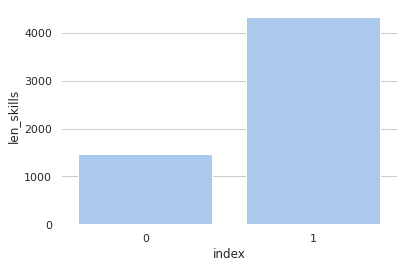

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

sns.set_color_codes("pastel")
sns.barplot(x="index", y="len_skills", data=per_skills.reset_index(drop = False),
            label="Total", color="b")
sns.despine(left=True, bottom=True)
plt.show()

In [56]:
df = df[df['len_skills'] > 0]

In [57]:
def get_competences(x):
    try:
        if len(x[0]) > 0:
            return x[0]
        else:
            return ''
    except:
        return ''

df["competences"] = df['skills'].apply(lambda x: get_competences(x).get("competences"))

In [58]:
def get_competences(x, i):
    try:
        if len(x[i]) > 0:
            return x[i]
        else:
            return ''
    except:
        return ''

for i in range(5):
    feature = 'Compet_' + str(i)
    df[feature] = df['competences'].apply(lambda x: get_competences(x, i))

In [59]:
def get_title(x):
    try:
        if len(x) > 0:
            return x.get('_id').get('title')
        else:
            return ''
    except:
        return ''
    
df["Compet_0"] = df['Compet_0'].apply(lambda x: get_title(x))
df["Compet_1"] = df['Compet_1'].apply(lambda x: get_title(x))
df["Compet_2"] = df['Compet_2'].apply(lambda x: get_title(x))
df["Compet_3"] = df['Compet_3'].apply(lambda x: get_title(x))
df["Compet_4"] = df['Compet_4'].apply(lambda x: get_title(x))

In [60]:
df['Compet_new'] = df['Compet_0'] + ' -- ' + df['Compet_1'] + ' -- ' + df['Compet_2'] + ' -- ' + df['Compet_3'] + ' -- ' + df['Compet_4']

del df['Compet_0']
del df['Compet_1']
del df['Compet_2']
del df['Compet_3']
del df['Compet_4']

In [61]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(tokenizer=lambda x: x.split(' -- '))
df = pd.DataFrame(vectorizer.fit_transform(df['Compet_new']).todense())

df.columns = vectorizer.get_feature_names()

df

,,agir collectivement,agir face aux imprévus,communiquer à l’oral,communiquer à l’écrit,gérer les informations,organiser son activité,prendre en compte les codes sociaux,prendre en compte les règles,utiliser le numérique,utiliser les mathématiques
0,1,0,1,0,0,1,1,0,1,0,0
1,1,0,0,0,1,1,0,0,1,0,1
2,2,0,1,0,0,1,1,0,0,0,0
3,1,0,0,1,0,1,1,1,0,0,0
4,1,1,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4324,1,0,1,1,0,1,1,0,0,0,0
4325,1,0,1,0,1,0,1,1,0,0,0
4326,2,1,0,0,1,0,1,0,0,0,0
4327,1,1,1,1,0,0,0,0,0,0,1


In [62]:
round(df.sum()[1:].sort_values(ascending = False)/df.shape[0]*100)[:20]

organiser son activité                 69.0
prendre en compte les règles           51.0
communiquer à l’oral                   47.0
gérer les informations                 46.0
agir collectivement                    43.0
agir face aux imprévus                 36.0
utiliser le numérique                  23.0
prendre en compte les codes sociaux    23.0
communiquer à l’écrit                  18.0
utiliser les mathématiques             15.0
dtype: float64

In [65]:
get_feature_correlation(df)[:10]

,Feature 1,Feature 2,Correlation
11,utiliser le numérique,communiquer à l’écrit,0.217604
13,prendre en compte les codes sociaux,communiquer à l’oral,0.187396
15,prendre en compte les règles,organiser son activité,0.151860
17,gérer les informations,utiliser le numérique,0.117276
19,utiliser les mathématiques,utiliser le numérique,0.113964
21,gérer les informations,communiquer à l’écrit,0.064120
23,agir collectivement,communiquer à l’oral,0.063909
25,communiquer à l’écrit,utiliser les mathématiques,0.054990
27,organiser son activité,agir collectivement,0.008544
29,organiser son activité,gérer les informations,-0.008810


In [31]:
import numpy as np
from kmodes.kmodes import KModes

# define the k-modes model
km = KModes(n_clusters=6, init='Huang')
# fit the clusters to the skills dataframe
clusters = km.fit_predict(df.iloc[:,1:])
# get an array of cluster modes
kmodes = km.cluster_centroids_
shape = kmodes.shape
# For each cluster mode (a vector of "1" and "0")
# find and print the column headings where "1" appears.
# If no "1" appears, assign to "no-skills" cluster.
for i in range(shape[0]):
    if sum(kmodes[i,:]) == 0:
        print("\ncluster " + str(i) + ": ")
        print("no-skills cluster")
    else:
        print("\ncluster " + str(i) + ": ")
        cent = kmodes[i,:]
        for j in df.iloc[:,1:].columns[np.nonzero(cent)]:
            print(j)


cluster 0: 
agir face aux imprévus
gérer les informations
organiser son activité
prendre en compte les règles

cluster 1: 
agir collectivement
agir face aux imprévus
organiser son activité

cluster 2: 
gérer les informations
organiser son activité

cluster 3: 
communiquer à l’oral
communiquer à l’écrit
utiliser le numérique

cluster 4: 
agir collectivement
communiquer à l’oral
organiser son activité
prendre en compte les règles

cluster 5: 
gérer les informations
utiliser le numérique


In [34]:
#df[(df["gérer les informations"] > 0) & (df["utiliser le numérique"] > 0)]

In [24]:
kmodes

array([[1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0],
       [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0],
       [1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0],
       [2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0]])

In [35]:
df.iloc[:,1:].corr()

,agir collectivement,agir face aux imprévus,communiquer à l’oral,communiquer à l’écrit,gérer les informations,organiser son activité,prendre en compte les codes sociaux,prendre en compte les règles,utiliser le numérique,utiliser les mathématiques
agir collectivement,1.000000,-0.080993,0.063909,-0.198411,-0.292692,0.008544,-0.036549,-0.047243,-0.229814,-0.072644
agir face aux imprévus,-0.080993,1.000000,-0.082421,-0.158274,-0.067266,-0.052955,-0.080524,-0.028750,-0.200467,-0.107106
communiquer à l’oral,0.063909,-0.082421,1.000000,-0.170033,-0.206001,-0.085676,0.187396,-0.192397,-0.206387,-0.154920
communiquer à l’écrit,-0.198411,-0.158274,-0.170033,1.000000,0.064120,-0.198338,-0.094745,-0.194901,0.217604,0.054990
gérer les informations,-0.292692,-0.067266,-0.206001,0.064120,1.000000,-0.008810,-0.183058,-0.044897,0.117276,-0.117730
organiser son activité,0.008544,-0.052955,-0.085676,-0.198338,-0.008810,1.000000,-0.087452,0.151860,-0.205178,-0.170396
prendre en compte les codes sociaux,-0.036549,-0.080524,0.187396,-0.094745,-0.183058,-0.087452,1.000000,-0.234555,-0.117320,-0.138298
prendre en compte les règles,-0.047243,-0.028750,-0.192397,-0.194901,-0.044897,0.151860,-0.234555,1.000000,-0.181411,-0.033915
utiliser le numérique,-0.229814,-0.200467,-0.206387,0.217604,0.117276,-0.205178,-0.117320,-0.181411,1.000000,0.113964
utiliser les mathématiques,-0.072644,-0.107106,-0.154920,0.054990,-0.117730,-0.170396,-0.138298,-0.033915,0.113964,1.000000


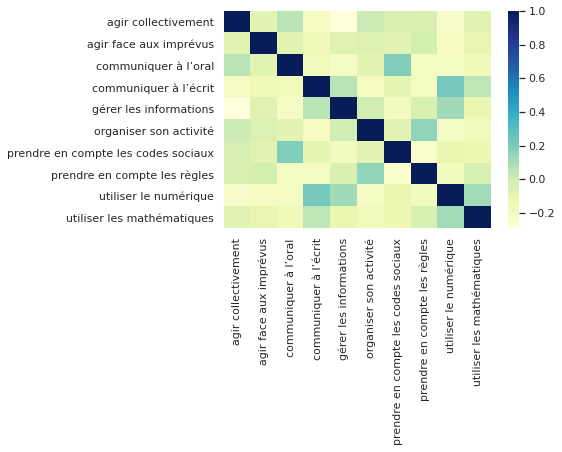

In [37]:
import seaborn as sns; sns.set()

ax = sns.heatmap(df.iloc[:,1:].corr(), cmap="YlGnBu")

# Métiers

In [75]:
import pandas as pd

df = pd.read_excel('exportfavorites.xlsx')

In [76]:
df = df[df['Id favori '].isna() == False]
df.head()

,Id favori,Date de creation,Id metier,Secteur Id,metier title,metier description,Unnamed: 6,metier accessibility,utilisateur email,utilisateur firstName,utilisateur lastName
0,5cdeb15f66de77a2a43611a3,2019-05-17T13:04:31.328Z,5cd3e0208b731f5d814a86a0,5ccfde918b731f5d814a85fb,Accessoiriste,"Dénicher, réparer, fabriquer des objets, telle...",NaN,CAP,mahdi@snu.fr,mahdi,mahdi
5,5cdeb26366de77a2a436144b,2019-05-17T13:08:51.097Z,5cd3e7068b731f5d814a86ab,5ccfde9a8b731f5d814a85fc,Diagnostiqueur/euse immobilier,Le diagnostiqueur immobilier intervient avant ...,NaN,Bac + 2,nono@nono.com,nono,nono
10,5cdfc94966de77a2a4375994,2019-05-18T08:58:49.279Z,5cd417ea8b731f5d814a86f4,5ccfdda68b731f5d814a85ea,Technicien/ne logistique,"Le technicien logistique contrôle, en qualité ...",NaN,Bac + 2,somme.vincent@live.fr,Vincent,Sommé
15,5cdfce9b66de77a2a437624e,2019-05-18T09:21:31.626Z,5cd41bb18b731f5d814a86fb,5ccfdda68b731f5d814a85ea,Facteur/trice,"Les facteurs, agents de tri et opérateurs de c...",NaN,CAP,somme.vincent@live.fr,Vincent,Sommé
20,5cdfce9e66de77a2a4376261,2019-05-18T09:21:34.121Z,5cd413f28b731f5d814a86e9,5ccfdda68b731f5d814a85ea,Chef/fe de produit marketing,Séduire le consommateur en s'adaptant en perma...,NaN,Bac + 5,somme.vincent@live.fr,Vincent,Sommé


In [85]:
len(df['metier title'].unique())

259

In [42]:
df.shape

(4050, 11)

In [41]:
df.columns

Index(['Id favori ', 'Date de creation', 'Id metier', 'Secteur Id ',
       'metier title', 'metier description', 'Unnamed: 6',
       'metier accessibility', 'utilisateur email', 'utilisateur firstName',
       'utilisateur lastName'],
      dtype='object')

In [13]:
len(df['utilisateur email'].unique())

763

In [87]:
#df['utilisateur email'].unique()

In [15]:
len(df['metier title'].unique())

259

In [116]:
df_count = df[['utilisateur email', 'metier title']].groupby(['utilisateur email']).agg(['count'])
df_count.columns = df_count.columns.droplevel(0)
df_count = df_count.rename_axis(None, axis=1)
df_count = df_count.sort_values(by=['count'], ascending = False).reset_index(drop = False)
df_count['count'] = df_count['count'].astype(int)
df_count = df_count[df_count['count'] <30]
df_count

,utilisateur email,count
6,iliasatmane7@gmail.com,26
7,negstark@gmail.com,26
8,teophil.jorry@monbilansnu.fr,25
9,esther.jourdan@monbilansnu.fr,24
10,morgan.feray@monbilansnu.fr,23
...,...,...
758,kylian.wuilleme@monbilansnu.fr,1
759,ko95360@gmail.com,1
760,karinetllr@gmail.com,1
761,karen.belot@monbilansnu.fr,1


In [120]:
#df_count['utilisateur email'].tolist()

In [122]:
df = df[df['utilisateur email'].isin(df_count['utilisateur email'].tolist())]

In [123]:
df['utilisateur email'].nunique()

757

In [134]:
df[['utilisateur email', 'metier title']].groupby(['utilisateur email']).agg(['count']).mean()

metier title  count    4.891678
dtype: float64

In [125]:
df[['utilisateur email', 'metier title']].groupby(['utilisateur email']).agg(['count']).median()

metier title  count    3.0
dtype: float64

In [126]:
df[['utilisateur email', 'metier title']].groupby(['metier title']).agg(['count']).mean()

utilisateur email  count    14.464844
dtype: float64

In [135]:
df[['utilisateur email', 'metier title']].groupby(['metier title']).count().max()

utilisateur email    130
dtype: int64

In [137]:
df[['utilisateur email', 'metier title']].groupby(['metier title']).count()

,utilisateur email
metier title,
Accessoiriste,10
Accompagnant/e éducatif/ve et social/e,26
Accompagnateur/trice de voyages,31
Acheteur/euse,19
Acheteur/euse d'espaces publicitaires,2
...,...
Vétérinaire,31
Yeld manager,5
ingénieur/e électronicien/ne,8


In [127]:
df[['utilisateur email', 'metier title']].groupby(['metier title']).agg(['count']).median()

utilisateur email  count    9.0
dtype: float64

In [138]:
df_count = df[['utilisateur email', 'metier title']].groupby(['metier title']).agg(['count'])#.sort_values(by=['count'])
df_count.columns = df_count.columns.droplevel(0)
df_count = df_count.rename_axis(None, axis=1)
df_count.sort_values(by=['count'], ascending = False)[:30]

,count
metier title,
Sapeur-pompier,130
Gendarme,121
Maître-chien,95
Entraîneur/euse sportif/ive,79
Educateur/trice sportif,75
Officier/ère de gendarmerie,72
Psychologue,70
Avocat,66
Hôtesse de l'air / Steward,61


In [49]:
df_count.sort_values(by=['count'], ascending = False)[-30:]

,count
metier title,
Technicien/ne qualité,3
Technicien/ne en automatismes,3
Ingénieur/e de maintenance industrielle,3
Chargé/e d'affaires en génie climatique,3
Technicien/ne de maintenance des trains,3
Technicien/ne de maintenance,3
Mécanicien/-ne-réparateur/-trice en matériel agricole,3
Acheteur/euse dans l'agroalimentaire,3
Chef/fe d'exploitation des remontées mécaniques,3


In [64]:
df['metier accessibility_cleaned'] = df['metier accessibility'].apply(lambda x: str(x).strip())
df['metier accessibility_cleaned'].replace('Cap','CAP', inplace= True)

In [65]:
df_count = df[['utilisateur email', 'metier accessibility_cleaned']].groupby(['metier accessibility_cleaned']).agg(['count'])#.sort_values(by=['count'])
df_count.columns = df_count.columns.droplevel(0)
df_count = df_count.rename_axis(None, axis=1)
df_count.sort_values(by=['count'], ascending = False)

,count
metier accessibility_cleaned,
Bac + 5,1183
Bac + 2,802
Bac,561
Bac + 3,417
CAP,416
Sans diplôme,170
Bac + 4,167
Bac + 9,108
Bac + 6,88


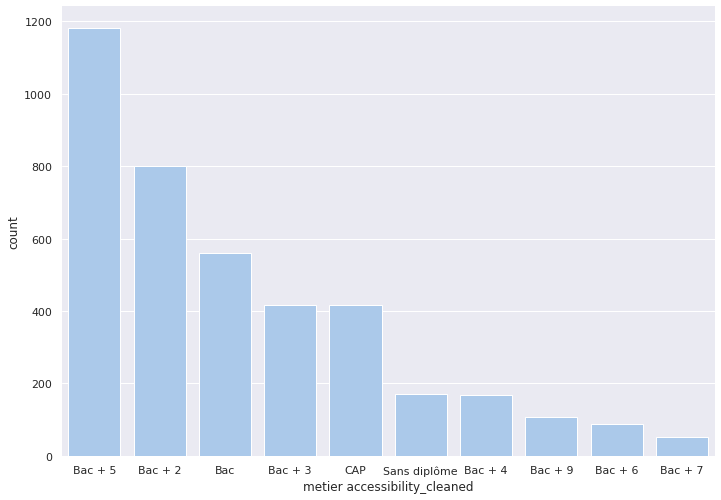

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.set_color_codes("pastel")
sns.barplot(x="metier accessibility_cleaned", y="count", data=df_count.sort_values(by=['count'], ascending = False).reset_index(drop = False).head(10),
            label="Total", color="b")
sns.despine(left=True, bottom=True)
plt.show()